## Retail Dataset Project (EDA + Business Insights)

#### Required Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# style for our graphs
plt.style.use('ggplot')

In [3]:
# Load dataset
sales = pd.read_csv("Retail_Dataset/sales.csv")
features = pd.read_csv("Retail_Dataset/features.csv")
stores = pd.read_csv("Retail_Dataset/stores.csv")

In [4]:
sales.shape , features.shape , stores.shape

((421570, 5), (8190, 12), (45, 3))

In [5]:
sales.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False


In [6]:
features.head(3)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False


In [7]:
stores.head(3)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392


In [8]:
print("============ SALES INFO ===============")
print(sales.info())

============ SALES INFO ===============
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
None


In [9]:
print("============ FEATURES INFO ===============")
print(features.info())

============ FEATURES INFO ===============
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB
None


In [10]:
print("============ STORES INFO ===============")
print(stores.info())

============ STORES INFO ===============
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB
None


In [11]:
# Convert Date Columns
sales['Date'] = pd.to_datetime(sales['Date'], format="%d/%m/%Y", dayfirst=True)
features['Date'] = pd.to_datetime(features['Date'], format="%d/%m/%Y", dayfirst=True)

In [12]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


In [13]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 712.0 KB


In [14]:
# Merge dataset stores , features
storeFeature = pd.merge(features,stores, on='Store' , how='inner')

In [15]:
storeFeature.shape

(8190, 14)

In [16]:
storeFeature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
 12  Type          8190 non-null   object        
 13  Size          8190 non-null   int64         
dtypes: bool(1), datetime64[ns](1), float64(9), int64(2), object(1)
memory usage: 839.9+ KB


In [17]:
# Sales + storeFeature dataset (merge)
df = pd.merge(sales, storeFeature , on=['Store','Date'] , how='left')

In [18]:
# final data set
print("============== FINAL DATASET =================")

============== FINAL DATASET =================


In [19]:
df.shape , sales.shape , storeFeature.shape

((421570, 17), (421570, 5), (8190, 14))

In [20]:
print("============== FINAL DATASET =================")
print(df.info())

============== FINAL DATASET =================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday_x   421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  IsHoliday_y   421570 

In [21]:
df.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315


In [22]:
print("=========== CHECKING MISSING VALUES ===============")
print(df.isnull().sum())

=========== CHECKING MISSING VALUES ===============
Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
Type                 0
Size                 0
dtype: int64


In [23]:
df.shape

(421570, 17)

In [24]:
# finding column names who has null values
null_col = []
for col in df.columns:
    if df[col].isnull().sum()>0:
        print(col)
        null_col.append(col)

MarkDown1
MarkDown2
MarkDown3
MarkDown4
MarkDown5


In [25]:
# Replacing null values with 0
for col in null_col:
    df[col] = df[col].fillna(value=0)

In [26]:
print("=========== CHECKING MISSING VALUES ===============")
print(df.isnull().sum())

=========== CHECKING MISSING VALUES ===============
Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday_x     0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday_y     0
Type            0
Size            0
dtype: int64


In [27]:
# Checking duplicates
df.duplicated().sum()

np.int64(0)

In [28]:
# There is no duplicate value (if there is any)
df = df.drop_duplicates()

In [29]:
df.shape

(421570, 17)

In [30]:
# FEATURE ENGINEERING

In [31]:
df.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,A,151315


In [32]:
# checking IsHoliday_x and IsHoliday_y for same value
not_match = 0
for i in range(df['IsHoliday_x'].count()):
    if df['IsHoliday_x'][i]!=df['IsHoliday_y'][i]:
        not_match+=1
not_match

0

In [33]:
df = df.drop(columns=['IsHoliday_x'])

In [34]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'IsHoliday_y', 'Type', 'Size'],
      dtype='object')

In [35]:
df = df.rename(columns={'IsHoliday_y':'IsHoliday'})

In [36]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'IsHoliday', 'Type', 'Size'],
      dtype='object')

In [37]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Month_Name'] = df['Date'].dt.strftime("%B")
df['Day'] = df['Date'].dt.day

In [38]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'IsHoliday', 'Type', 'Size', 'Year', 'Month',
       'Month_Name', 'Day'],
      dtype='object')

In [39]:
df.head(4)

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Year,Month,Month_Name,Day
0,1,1,2010-02-05,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,2010,2,February,5
1,1,1,2010-02-12,46039.49,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,A,151315,2010,2,February,12
2,1,1,2010-02-19,41595.55,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,A,151315,2010,2,February,19
3,1,1,2010-02-26,19403.54,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,A,151315,2010,2,February,26


In [40]:
# Creating Total Mark Downs
df['TotalMarkDown'] = df[null_col].sum()
df['TotalMarkDown'] = df['TotalMarkDown'].fillna(0)
# Finding Price Per Unit
df['Sales_Per_Unit'] = df['Weekly_Sales']/df['Size']

In [41]:
df.head(3)

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,Unemployment,IsHoliday,Type,Size,Year,Month,Month_Name,Day,TotalMarkDown,Sales_Per_Unit
0,1,1,2010-02-05,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,...,8.106,False,A,151315,2010,2,February,5,0.0,0.164719
1,1,1,2010-02-12,46039.49,38.51,2.548,0.0,0.0,0.0,0.0,...,8.106,True,A,151315,2010,2,February,12,0.0,0.304263
2,1,1,2010-02-19,41595.55,39.93,2.514,0.0,0.0,0.0,0.0,...,8.106,False,A,151315,2010,2,February,19,0.0,0.274894


In [42]:
# GLOBAL KPI
total_sales = df['Weekly_Sales'].sum()
avg_weekly_sales = df['Weekly_Sales'].mean()
num_stores = df['Store'].nunique()
num_dept = df['Dept'].nunique()

In [43]:
total_sales , avg_weekly_sales , num_stores , num_dept

(np.float64(6737218987.11), np.float64(15981.25812346704), 45, 81)

In [44]:
# EDA :- Exploratory Data Analysis

In [53]:
# Sales By Store
sales_by_store = df.groupby('Store').agg({'Weekly_Sales':'sum'}).sort_values(ascending=False,by='Weekly_Sales').reset_index()
sales_by_store.head(5)

,Store,Weekly_Sales
0,20,3.013978e+08
1,4,2.995440e+08
2,14,2.889999e+08
3,13,2.865177e+08
4,2,2.753824e+08


In [55]:
# Sales By Store Type
sales_by_storeType = df.groupby('Type').agg({'Weekly_Sales':'sum'}).sort_values(ascending=False,by='Weekly_Sales').reset_index()
sales_by_storeType

,Type,Weekly_Sales
0,A,4.331015e+09
1,B,2.000701e+09
2,C,4.055035e+08


In [56]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'IsHoliday', 'Type', 'Size', 'Year', 'Month',
       'Month_Name', 'Day', 'TotalMarkDown', 'Sales_Per_Unit'],
      dtype='object')

In [60]:
# Sales By Department
sales_by_dept = df.groupby('Dept').agg({'Weekly_Sales':'sum'}).sort_values(ascending=False,by='Weekly_Sales').reset_index()
sales_by_dept.head(4)

,Dept,Weekly_Sales
0,92,4.839433e+08
1,95,4.493202e+08
2,38,3.931181e+08
3,72,3.057252e+08


In [61]:
print("=========== TOP 10 Departments =============")
print(sales_by_dept.head(10))

=========== TOP 10 Departments =============
   Dept  Weekly_Sales
0    92  4.839433e+08
1    95  4.493202e+08
2    38  3.931181e+08
3    72  3.057252e+08
4    90  2.910685e+08
5    40  2.889360e+08
6     2  2.806112e+08
7    91  2.167817e+08
8    13  1.973216e+08
9     8  1.942808e+08


In [74]:
# Sales By Month
sales_by_month = df.groupby(['Year','Month_Name']).agg({'Weekly_Sales':'sum'}).sort_values(by=['Year']).reset_index()
sales_by_month.head(5)

,Year,Month_Name,Weekly_Sales
0,2010,April,2.314124e+08
1,2010,August,1.876401e+08
2,2010,December,2.887605e+08
3,2010,February,1.903330e+08
4,2010,July,2.325801e+08


In [75]:
# Sales By Holiday
sales_by_holiday = df.groupby('IsHoliday').agg({'Weekly_Sales':'sum'}).sort_values(ascending=False,by='Weekly_Sales').reset_index()
sales_by_holiday.head(4)

,IsHoliday,Weekly_Sales
0,False,6.231919e+09
1,True,5.052996e+08


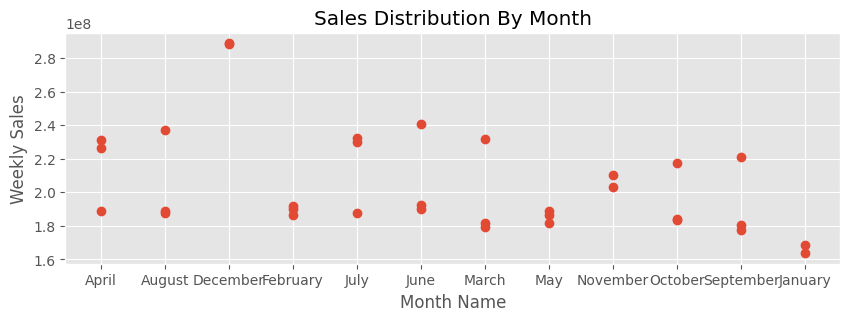

In [81]:
# VISUALIZATION
# Monthly Sales Trends
plt.figure(figsize=(10,3))
plt.plot(sales_by_month['Month_Name'],sales_by_month['Weekly_Sales'],'o')
plt.title("Sales Distribution By Month")
plt.xlabel("Month Name")
plt.ylabel("Weekly Sales")
plt.show()

============= TOP 10 STORES BY WEEKLY SALES ============


<Figure size 1000x300 with 0 Axes>

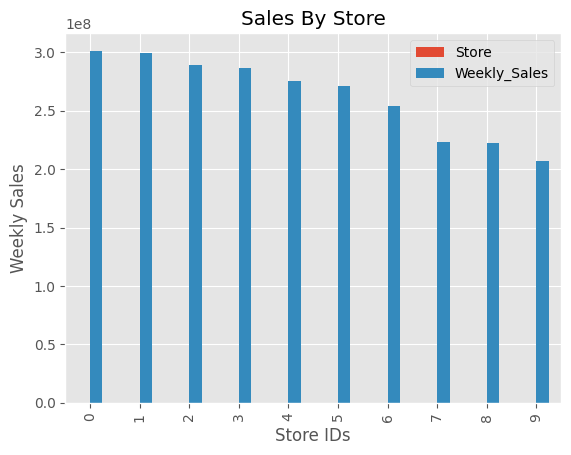

In [85]:
# Sales by Store (Top 10 Store)
print("============= TOP 10 STORES BY WEEKLY SALES ============")
plt.figure(figsize=(10,3))
sales_by_store.head(10).plot(kind='bar')
plt.title("Sales By Store")
plt.xlabel("Store IDs")
plt.ylabel("Weekly Sales")
plt.show()

============= TOP 10 DEPARTMENTS BY WEEKLY SALES ============


<Figure size 1000x300 with 0 Axes>

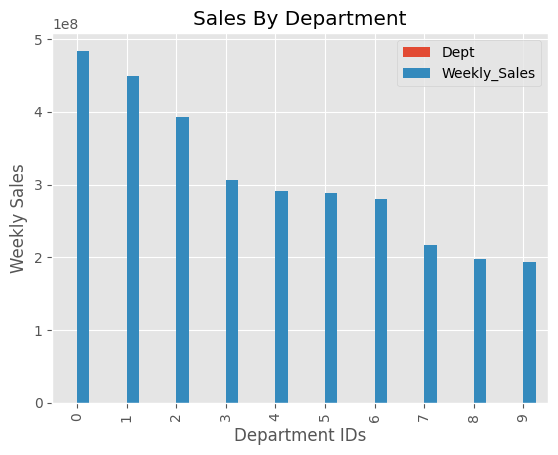

In [86]:
# Sales by Department (Top 10 Department)
print("============= TOP 10 DEPARTMENTS BY WEEKLY SALES ============")
plt.figure(figsize=(10,3))
sales_by_dept.head(10).plot(kind='bar')
plt.title("Sales By Department")
plt.xlabel("Department IDs")
plt.ylabel("Weekly Sales")
plt.show()

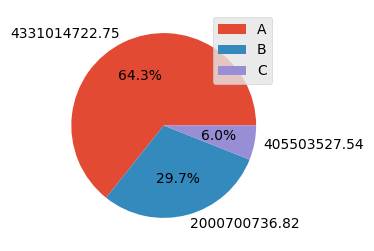

In [94]:
# Sales by Store Type
plt.figure(figsize=(6,3))
plt.pie(sales_by_storeType['Weekly_Sales'],labels=sales_by_storeType['Weekly_Sales'],autopct="%1.1f%%")
plt.legend(sales_by_storeType['Type'])
plt.show()